In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from matplotlib import pyplot as plt 
import cv2 as cv

# Introduction

In this notebook I will use Yolo V5 to do object detection on the images of the dataset. This will likely be different to the average notebook as I will be cloning the github of YoloV5 to use it and therefore working with the filesystem of Kaggle. 

I hope this serves as an introduction on how to use this powerful tool for image segmentation that is YoloV5

# Look at Some Images

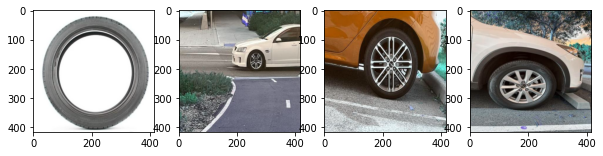

In [2]:
fig,ax = plt.subplots(1,4,figsize=(10,5))
image = cv.imread("../input/sptire/train/images/14_19_l_jpg.rf.8323d9f848377e32ca451017a3a80731.jpg")
ax[0].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0719_JPEG.rf.05f197445c4a42854e0b1f308fb4e636.jpg")
ax[1].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0680_JPEG.rf.560c49e01182db8356989ddc604557fb.jpg")
ax[2].imshow(image)
image = cv.imread("../input/sptire/train/images/IMG_0701_JPEG.rf.d5ae66ab383142ef5d59b0454a19fdce.jpg")
ax[3].imshow(image)
fig.show()

# Create the File System

In [3]:
%cd ../
!mkdir tmp
%cd tmp

/kaggle
/kaggle/tmp


# Download YoloV5

In [4]:
# Download YOLOv5
!git clone https://github.com/ultralytics/yolov5  # clone repo
%cd yolov5
# Install dependencies
%pip install -qr requirements.txt  # install dependencies

%cd ../
import torch
print(f"Setup complete. Using torch {torch.__version__} ({torch.cuda.get_device_properties(0).name if torch.cuda.is_available() else 'CPU'})")

Cloning into 'yolov5'...
remote: Enumerating objects: 12399, done.
remote: Counting objects: 100% (19/19), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 12399 (delta 5), reused 15 (delta 3), pack-reused 12380
Receiving objects: 100% (12399/12399), 12.17 MiB | 7.88 MiB/s, done.
Resolving deltas: 100% (8548/8548), done.
/kaggle/tmp/yolov5
Note: you may need to restart the kernel to use updated packages.
/kaggle/tmp
Setup complete. Using torch 1.11.0 (Tesla P100-PCIE-16GB)


# New YAML file

Create new Yaml file to fit the file system. 

In [5]:
# Create .yaml file 
import yaml

data_yaml = dict(
    train = '../../input/sptire/train',
    val = '../../input/sptire/valid',
    nc = 1,
    names = ['Tire']
)

# Note that I am creating the file in the yolov5/data/ directory.
with open('data.yaml', 'w') as outfile:
    yaml.dump(data_yaml, outfile, default_flow_style=True)

In [6]:
%cd yolov5

/kaggle/tmp/yolov5


# Train the Yolov5 Model

In [7]:
!wandb disabled
!python train.py --img 416 --batch 16 --epochs 50 --data ../data.yaml --weights yolov5n.pt

W&B disabled.
train: weights=yolov5n.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-278-g1ab23fc Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, hsv_h=0.015, hsv_s=0.7

# Model Validation Output

Let's look at how the model performed on a validation batch

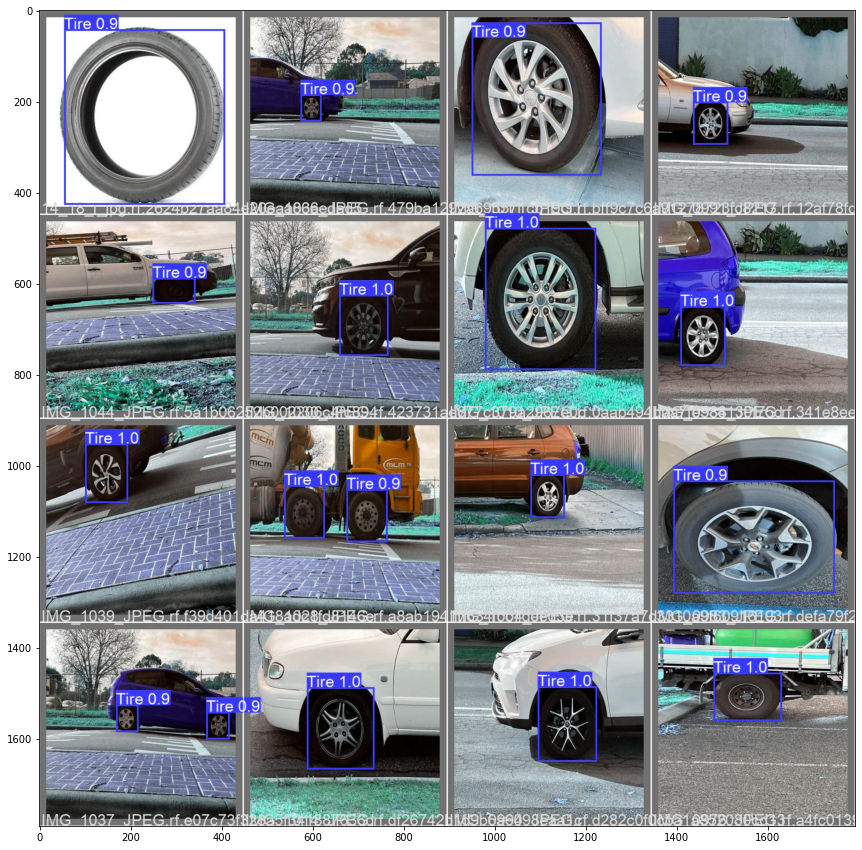

In [8]:
img = cv.imread("runs/train/exp/val_batch0_pred.jpg")
plt.figure(figsize=(15, 15))
plt.imshow(img)

# Test the model

This will test the model we have created against an image it has not seen previously.

In [9]:
!python detect.py --source ../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg --weights runs/train/exp/weights/best.pt

detect: weights=['runs/train/exp/weights/best.pt'], source=../../input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-278-g1ab23fc Python-3.7.12 torch-1.11.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)

Fusing layers... 
Model summary: 213 layers, 1760518 parameters, 0 gradients, 4.1 GFLOPs
image 1/1 /kaggle/input/sptire/test/images/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg: 640x640 1 Tire, Done. (0.008s)
Speed: 0.5ms pre-process, 8.1ms inference, 1.4ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/detect/exp


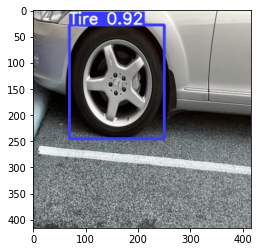

In [10]:
img = cv.imread("runs/detect/exp/IMG_0672_JPEG.rf.c37833de9c2310cfba797a83f239d3c1.jpg")
plt.imshow(img)

# Conclusion

This shows YoloV5 being effective with this dataset. I am keen to see what you can do with the dataset :).